## Exploration 4

### Goals of this exploration
* Based on user specified criteria of brands and/or product names, filter the rows and display stats of the filtered rows

In [15]:
# This is to prepare environment and import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
import random
import pickle

In [16]:
# Load saved tagged reviews, prepared in "Exploration 3"
tagged_review_file = open('taggedDigitSoftwareReviews', "rb")
tagged_reviews = pickle.load(tagged_review_file)
tagged_review_file.close()

In [17]:
tagged_reviews[['product_title','tags','review_date']].describe()

,product_title,tags,review_date
count,101836,101836,101831
unique,2639,150,2198
top,Avast Free Antivirus 2015 [Download],turbotax,2015-03-04
freq,9462,17736,445


In [50]:
user_key_words = "Intuit"
#user_key_words = "microsoft"
user_key_words = user_key_words.lower()

In [52]:
#tagged_reviews[['product_title','tags']]
#tagged_reviews[tagged_reviews.review_headline == "Five Stars"]
target = tagged_reviews[tagged_reviews.tags.str.match(user_key_words)]

In [53]:
target.star_rating.describe()

count    3062.000000
mean        2.991182
std         1.641583
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: star_rating, dtype: float64

In [54]:
target.describe()

,customer_id,star_rating,length
count,3.062000e+03,3062.000000,3062.000000
mean,3.236466e+07,2.991182,513.705095
std,1.602156e+07,1.641583,817.711804
min,5.251000e+04,1.000000,1.000000
25%,1.714659e+07,1.000000,135.000000
50%,3.443578e+07,3.000000,314.000000
75%,4.841132e+07,5.000000,644.500000
max,5.309419e+07,5.000000,20439.000000


In [55]:
target[target.length > 10000 ]  
# Business Insight: 3 TurboTax reviewers from 2 reviewers wrote over 10k words ... probably very negative

,customer_id,review_id,product_id,product_title,product_category,star_rating,review_headline,review_body,review_date,sentiment,tags,length
41090,50750054,R24LLSBSBPJ8AY,B00KCXNBPG,Paint Studio Pro & Ex,Digital_Software,5,My go-to software for professional illustratio...,I have lots of software I use for illustration...,2014-11-07,Positive,intuit,17514
41131,50750054,R1434M2GEJLB7E,B00KC76ATG,Paint Studio Pro & Ex,Digital_Software,5,My go-to software for professional illustratio...,I have lots of software I use for illustration...,2014-11-07,Positive,intuit,17898
45450,52978391,RB8PUB93R2QVO,B00M76N6MO,Intuit Quicken for Mac 2015,Digital_Software,1,"Beyond a joke: incompatible, feature-poor Quic...",Eight long years after its last real update of...,2014-09-09,Negative,intuit|quicken,20439


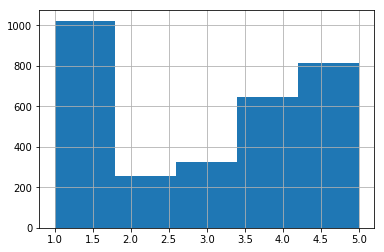

In [56]:
# Rating distribution
#target['star_rating'].hist(figsize=(15,10),bins=24)
target['star_rating'].hist(bins=5)

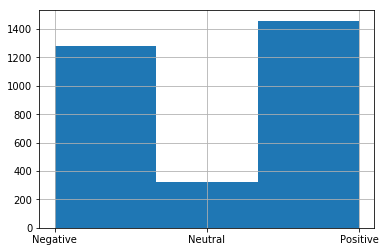

In [57]:
# Sentiment distribution
target['sentiment'].hist(bins=3)

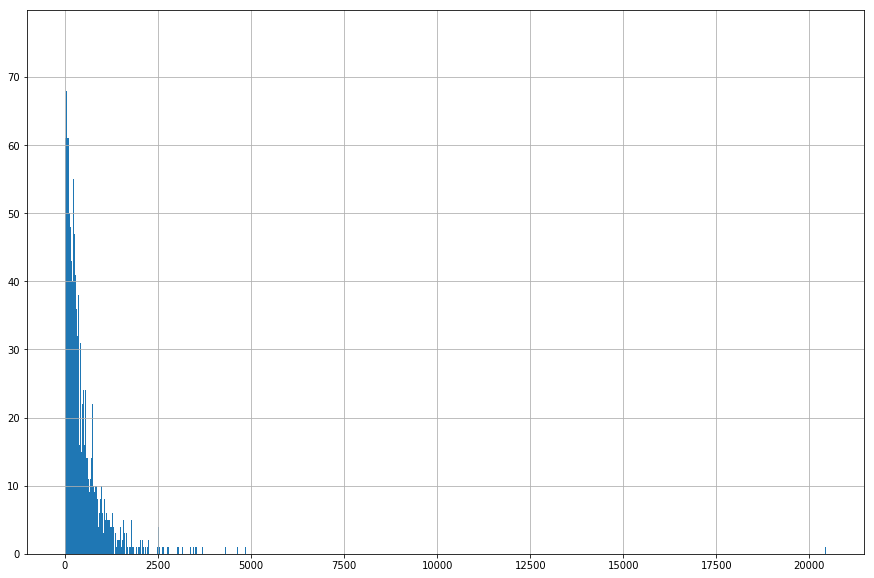

In [59]:
# Review body length distribution
target['length'].hist(figsize=(15,10),bins=2000)

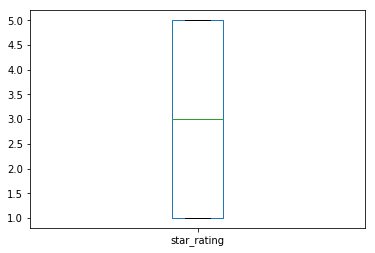

In [60]:
target['star_rating'].plot(kind="box")

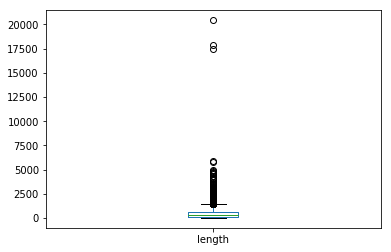

In [61]:
target['length'].plot(kind="box")

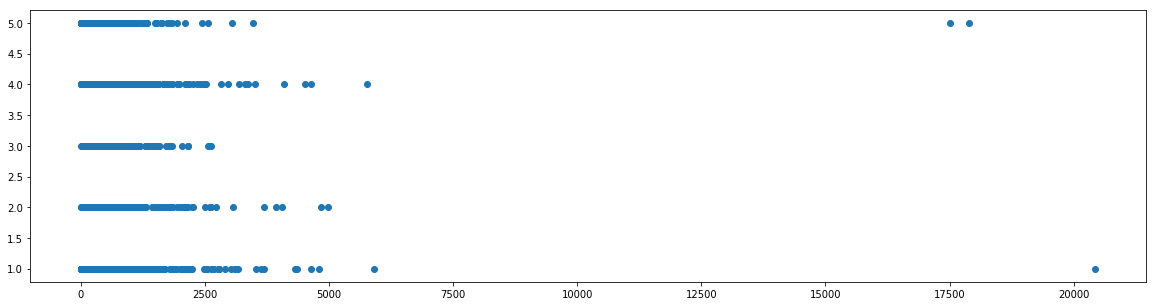

In [62]:
#sp=plt.scatter(target['star_rating'],target['sentiment'])
plt.figure(figsize=(20,5))
sp=plt.scatter(target['length'],target['star_rating'])

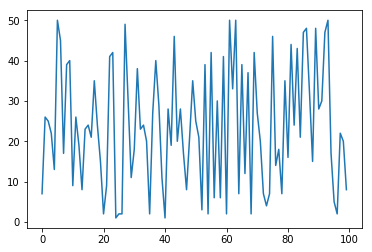

In [49]:
from io import StringIO
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
fig = plt.figure()

axis = fig.add_subplot(1, 1, 1)

xs = range(100)
ys = [random.randint(1, 50) for x in xs]

axis.plot(xs, ys)

#canvas = FigureCanvas(fig)
#output = StringIO()
#canvas.print_png(output)



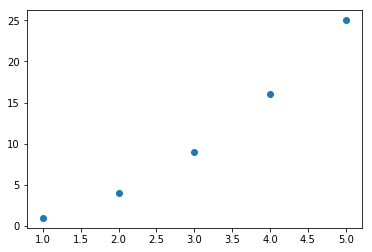

In [44]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
fig = plt.figure()

axis = fig.add_subplot(111)
axis.scatter(x, y)

#plt.scatter(x, y)
#plt.show()